In [9]:
import pandas as pd

df = pd.read_csv("../data/Heart.csv", index_col=0)

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [11]:
df.dropna(inplace=True)

<Axes: xlabel='AHD', ylabel='count'>

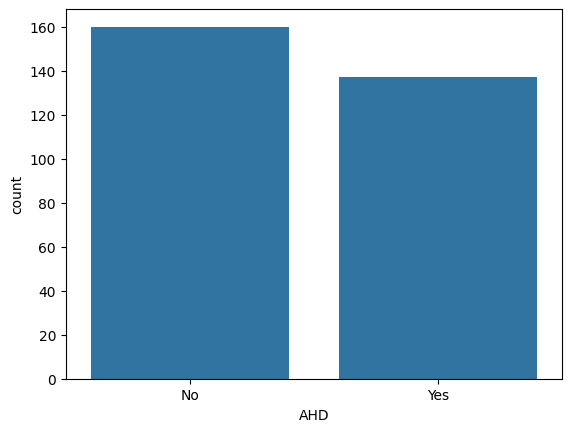

In [12]:
import seaborn as sns

sns.countplot(data = df, x = "AHD")

In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False


In [14]:
from sklearn.model_selection import train_test_split
X, y = df.drop("AHD_Yes", axis="columns"), df["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


              precision    recall  f1-score   support

       False       0.82      0.74      0.78        50
        True       0.71      0.80      0.75        40

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90



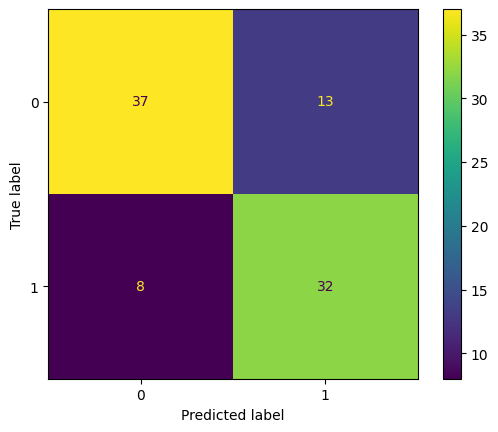

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(RandomForestClassifier(random_state=1234))

params = {"randomforestclassifier__n_estimators": range(80,200,10), "randomforestclassifier__max_depth":[1, 2, 5]}

clf = GridSearchCV(estimator=pipe, cv=5, param_grid=params, scoring="recall")

clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={'randomforestclassifier__max_depth': [1, 2, 5],
                         'randomforestclassifier__n_estimators': range(80, 200, 10)},
             scoring='recall')

In [17]:
clf.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__n_estimators': 80}

              precision    recall  f1-score   support

       False       0.81      0.84      0.82        50
        True       0.79      0.75      0.77        40

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.80        90
weighted avg       0.80      0.80      0.80        90



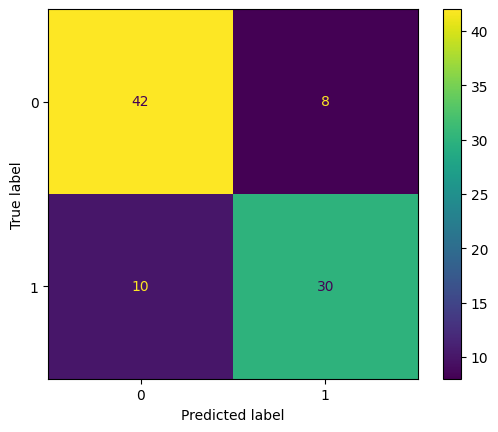

In [19]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()